In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\ALMASRIA 4 COMP\Desktop\ML\Mall_Customers.csv")


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.preprocessing import LabelEncoder
df["Gender"] = LabelEncoder().fit(['Male', 'Female']).transform(df.Gender)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
df.drop(["CustomerID"],axis='columns',inplace=True)

In [8]:
correlation = df.corr()

correlation

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<Axes: >

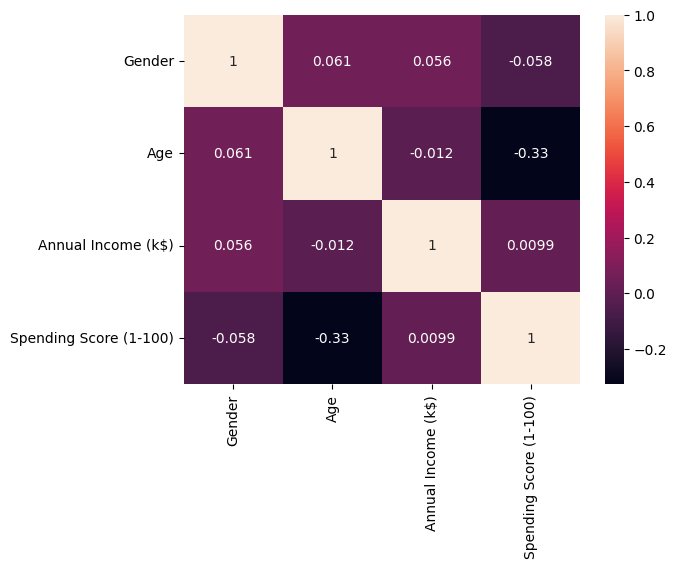

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [15]:
X =df[["Spending Score (1-100)","Age"]]


In [17]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit(X).transform(X)
X.std()


np.float64(1.0)

In [13]:
df_scaled_pd =pd.DataFrame(df_scaled,columns=df.columns)
df_scaled_pd

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [22]:
Clustering_score= []
for i in range(1,11):
    kmean_model= KMeans(n_clusters =i, init= 'random', random_state=42) #  'k-means++' initialization
    kmean_model.fit(X)
    Clustering_score.append(kmean_model.inertia_)


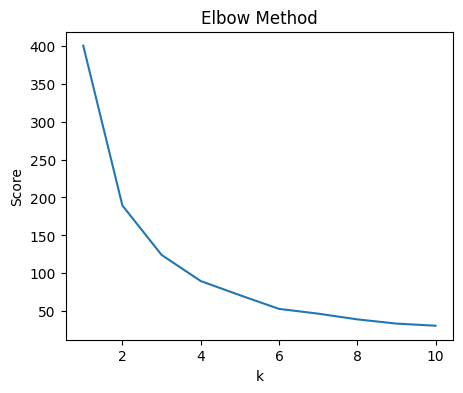

In [23]:
plt.figure(figsize=(5,4))
plt.plot(range(1,11),Clustering_score)
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()

Text(0, 0.5, 'Clustering Score')

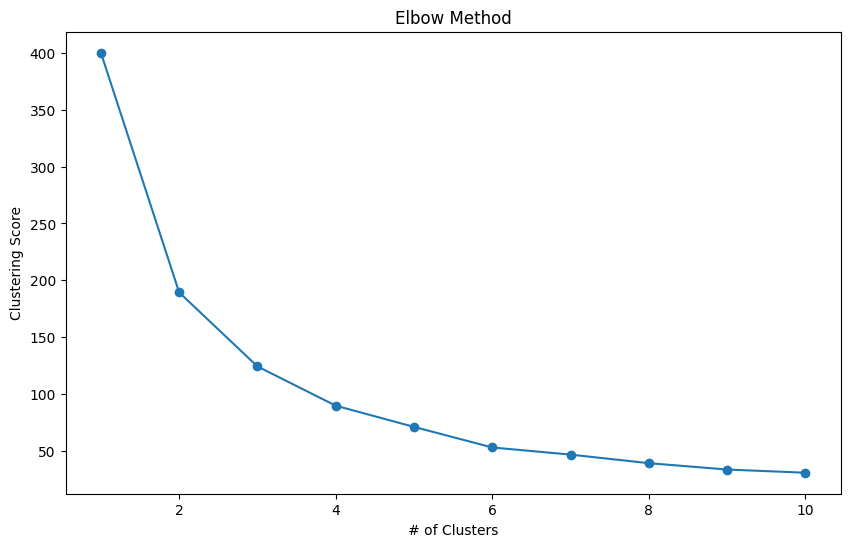

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),Clustering_score)
plt.scatter(range(1,11),Clustering_score)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Clustering Score')

In [20]:
from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters=3,init='random')
kmean_model.fit(X)
cp= kmean_model.cluster_centers_
kmean_model.inertia_
print(kmean_model.inertia_)

124.32628617921534


In [21]:
kmean_model.score(X)

-124.32628617921534